# Visual comparison of simulated chromatin and ChromEMT data

In this notebook, we do a quick visual comparison of our simulated chromatin and high-resolution EMT data (ChromEMT by Ou et al.)

We also approximate lower resolution (light) microscopy by blurring our images

In [1]:
import numpy as np
from chromemt_analysis import parse_simulation_dat, parse_simulation_zip, fwhm2sigma

from skimage.util import invert

## read simulated data
### alternative 1:

read old example data from uncompressed results (simulation rasterized into 5nm voxels)

In [25]:
simulation_file = '/Volumes/davidh-ssd/chromemt_data/simulations/VoxelExample.dat'

psz, arr = parse_simulation_dat(simulation_file)

# to float / invert to get EM-like image
arr = arr.astype(np.float32)
arr = invert(arr)

5.0

### alternative 2:

read new simulation data (regular chromatin) from zipped results (simulated with 1.28nm voxels, like ChromEMT)

In [28]:
zip_example = '/Volumes/davidh-ssd/chromemt_data/simulations/VoxelTestReg.zip'

psz, arr = parse_simulation_zip(zip_example)

arr = arr.astype(np.float32)
arr = invert(arr)

1.28

Calculate chromatin volume concentration (CVC) like in ChromEMT paper:

In [29]:
# CVC: invert again (-> chromatin = 1), sum, divide by arr size
invert(arr).sum() / arr.size

0.09270671994572233

## read ChromEMT data

In [37]:
from skimage.io import imread
from skimage.transform import rescale

# image at http://www.cellimagelibrary.org/images/49801
# pixelsize: 1.28 nm
img_chromemet = imread('/Volumes/davidh-ssd/chromemt_data/49801.tif')

# rescale to have same pixel size as simulation data & convert to float
img_chromemet = rescale(img_chromemet, 1.28 / psz)
img_chromemet = img_chromemet.astype(np.float32)

## Simulate lower resolution microscopy

We blur simulation results to match resolution of common light microscopy techniques

In [38]:
from scipy.ndimage import gaussian_filter

fwhm_3d_sted = np.array([100, 100, 100]) / psz
fwhm_sted = np.array([500, 50, 50]) / psz
fwhm_sim = np.array([250, 125, 125]) / psz
fwhm_conf = np.array([500, 250, 250]) / psz

img_highres = gaussian_filter(arr, 0.5)
img_3d_sted = gaussian_filter(arr, fwhm2sigma(fwhm_3d_sted))
img_sted = gaussian_filter(arr, fwhm2sigma(fwhm_sted))
img_sim = gaussian_filter(arr, fwhm2sigma(fwhm_sim))
img_conf = gaussian_filter(arr, fwhm2sigma(fwhm_conf))

In [39]:
# get cut from ChromEMT that has the same size as simulation box

# for 1.28 nm voxel data:
chromemt_offset = [500, 500]
# for 5 nm voxel data:
# chromemt_offset = [100, 100]

off_y, off_x = chromemt_offset
img_chromemet_cut = img_chromemet[:, off_y:off_y+arr.shape[0], off_x:off_x+arr.shape[0]]

chromemet_img_3d_sted = gaussian_filter(img_chromemet_cut, fwhm2sigma(fwhm_3d_sted))
chromemet_img_sted = gaussian_filter(img_chromemet_cut, fwhm2sigma(fwhm_sted))
chromemet_img_sim = gaussian_filter(img_chromemet_cut, fwhm2sigma(fwhm_sim))
chromemet_img_conf = gaussian_filter(img_chromemet_cut, fwhm2sigma(fwhm_conf))

img_chromemet.shape, arr.shape

((121, 1108, 942), (305, 305, 305))

In [ ]:
# view in napari
import napari
napari.view_image(img_highres)

### Plots of mid planes at various resolutions

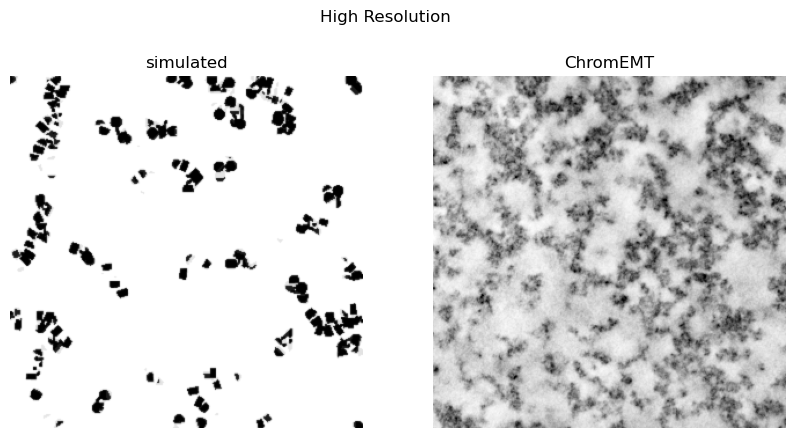

In [40]:
from matplotlib import pyplot as plt

def plot_comparison_midplane(img_sim, img_chromet, title='', figsize=None):
    fig, axs = plt.subplots(ncols=2, figsize=figsize)

    axs[0].imshow(img_sim[img_sim.shape[0]//2], cmap='gray')
    axs[0].set_title('simulated')
    axs[0].axis('off')
    axs[1].imshow(img_chromet[img_chromet.shape[0]//2], cmap='gray')
    axs[1].set_title('ChromEMT')
    axs[1].axis('off')
    
    # fig.tight_layout()
    fig.suptitle(title)

plot_comparison_midplane(img_highres, img_chromemet_cut, 'High Resolution', figsize=(10,5))
# plt.savefig('c:/users/david/sim_chromemt_comparison_highres.png')


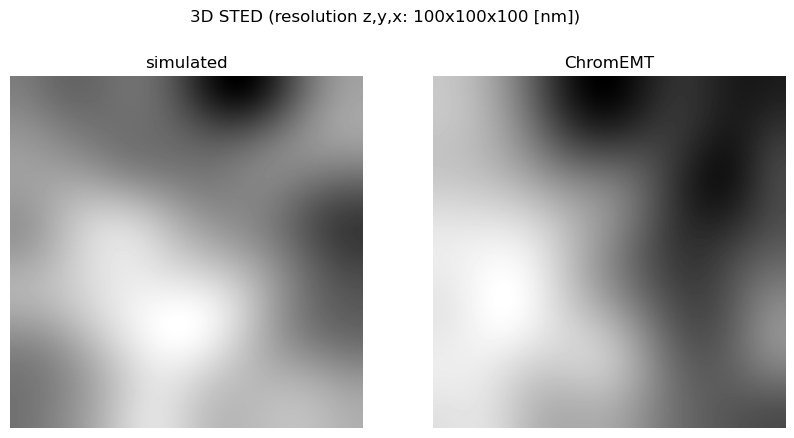

In [41]:
plot_comparison_midplane(img_3d_sted, chromemet_img_3d_sted, '3D STED (resolution z,y,x: 100x100x100 [nm])', figsize=(10,5))
# plt.savefig('c:/users/david/sim_chromemt_comparison_3dsted.png')

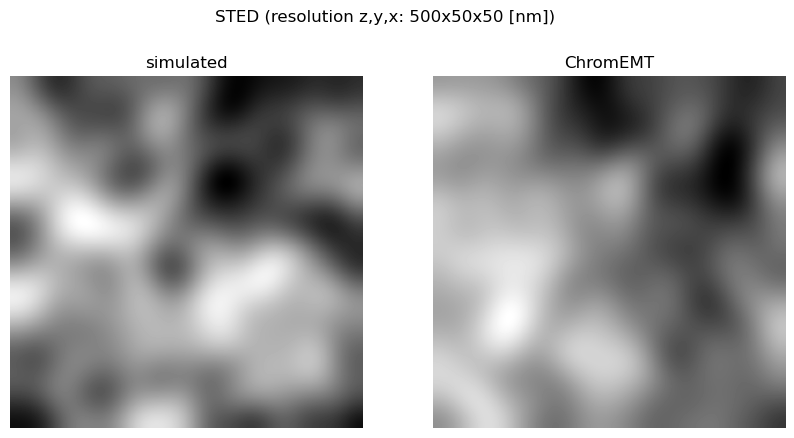

In [42]:
plot_comparison_midplane(img_sted, chromemet_img_sted, 'STED (resolution z,y,x: 500x50x50 [nm])', figsize=(10,5))
# plt.savefig('c:/users/david/sim_chromemt_comparison_sted.png')

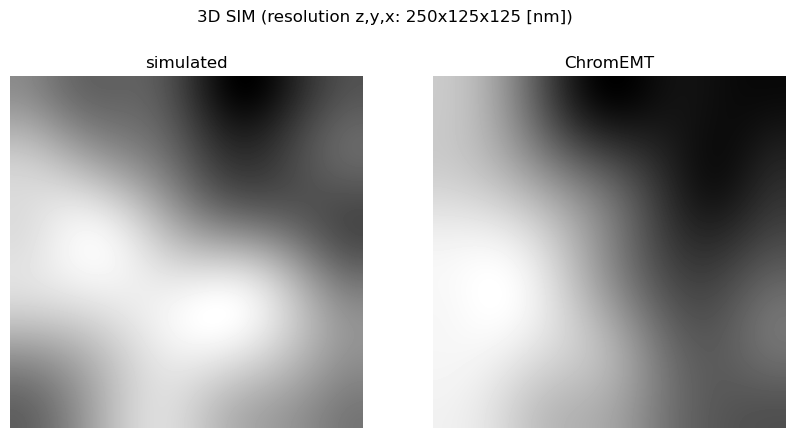

In [43]:
plot_comparison_midplane(img_sim, chromemet_img_sim, '3D SIM (resolution z,y,x: 250x125x125 [nm])', figsize=(10,5))
# plt.savefig('c:/users/david/sim_chromemt_comparison_3dsim.png')

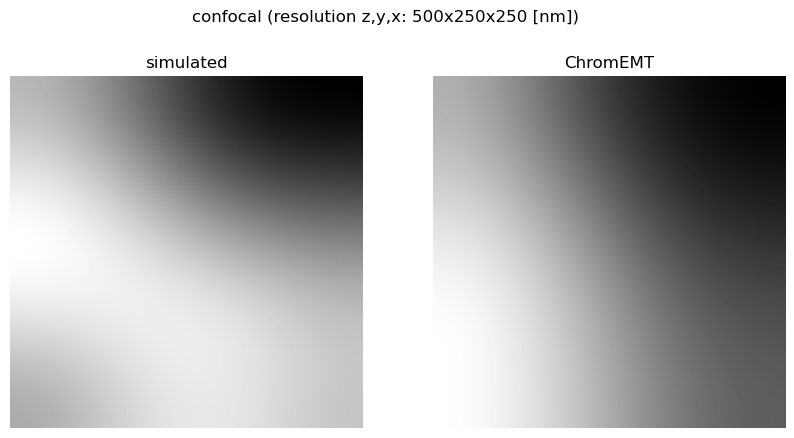

In [44]:
plot_comparison_midplane(img_conf, chromemet_img_conf, 'confocal (resolution z,y,x: 500x250x250 [nm])', figsize=(10,5))
# plt.savefig('c:/users/david/sim_chromemt_comparison_confocal.png')